In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp

from sir_model import *

### Task 5.1 & 5.2

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


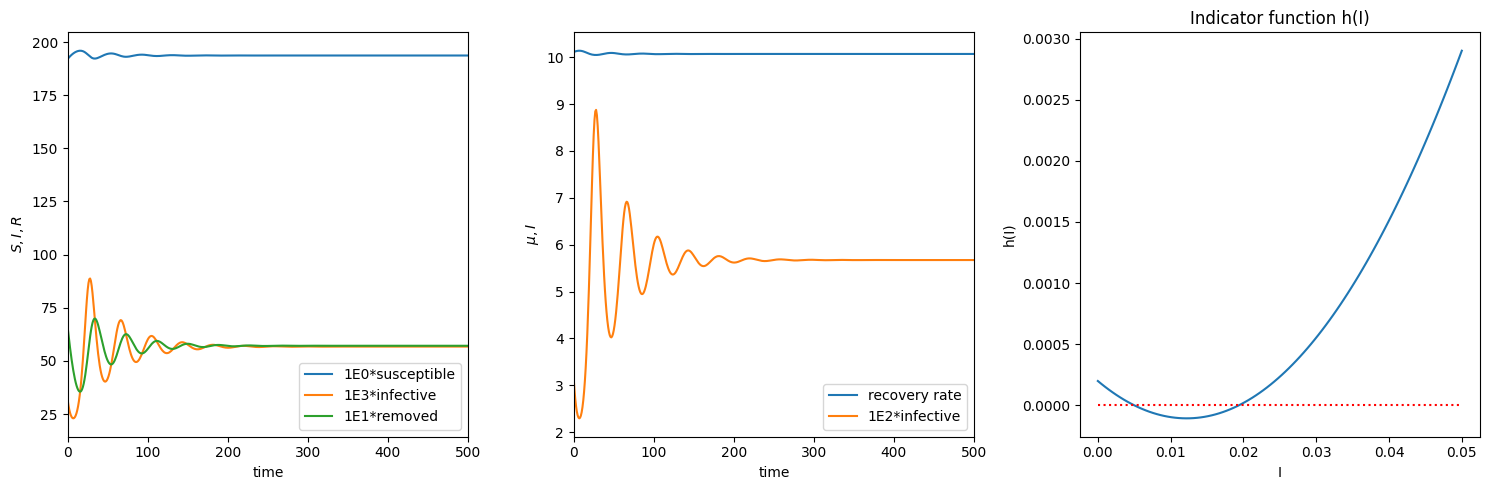

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

### Task 5.3

C:\Temp\ipykernel_108700\355614162.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5,5))


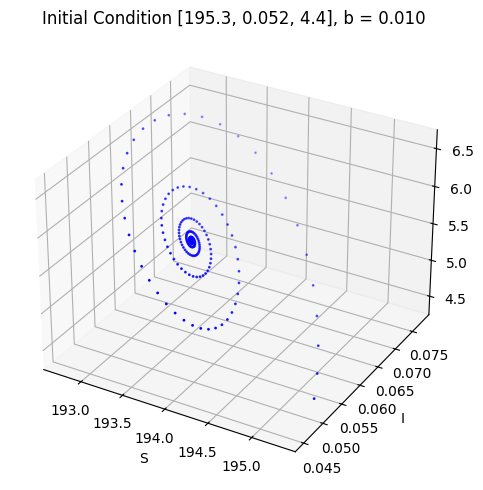

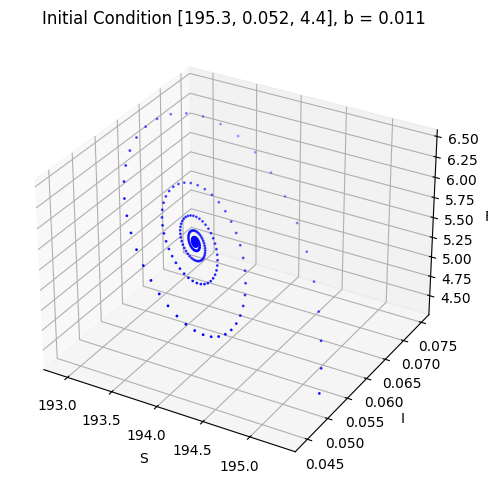

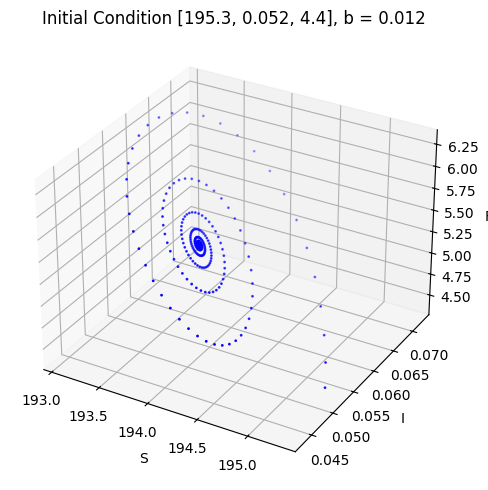

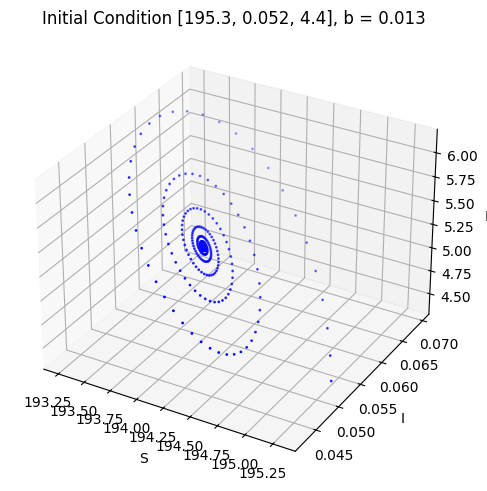

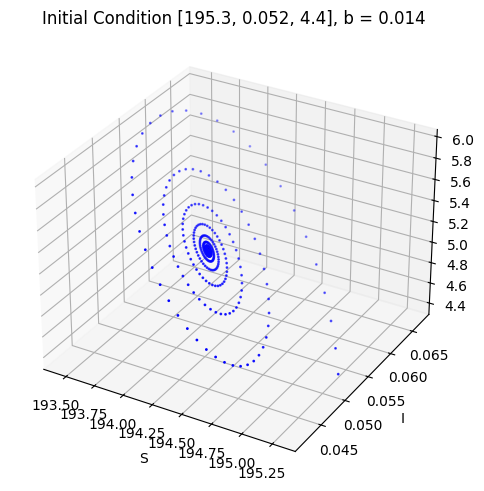

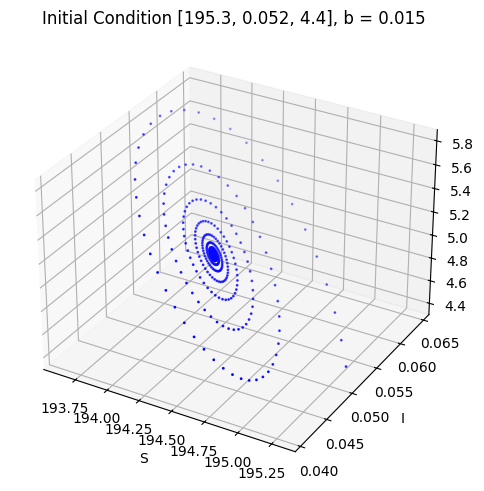

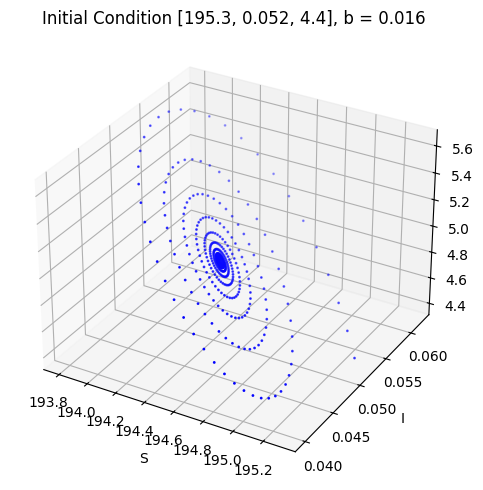

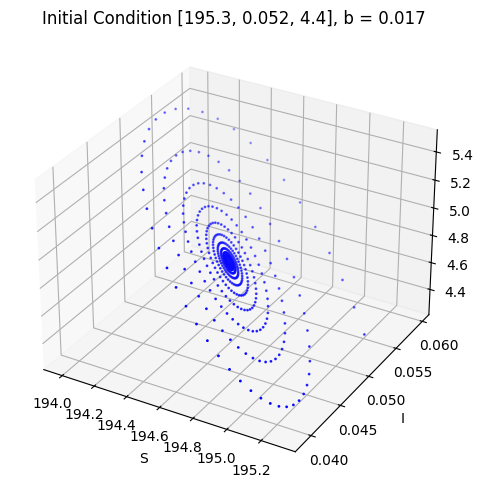

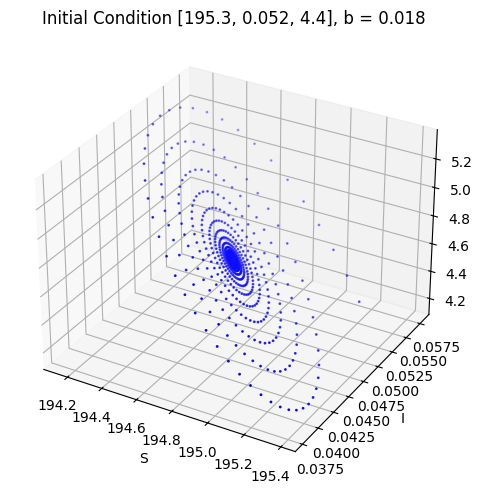

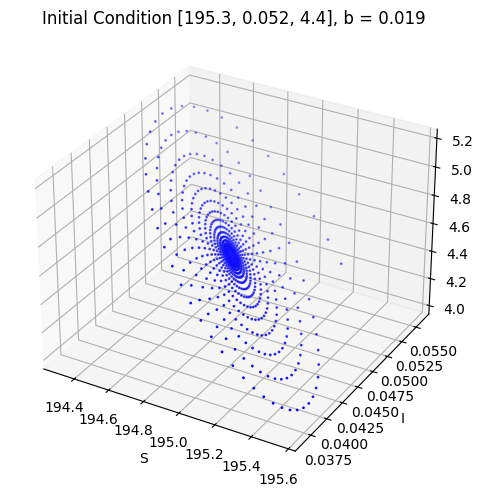

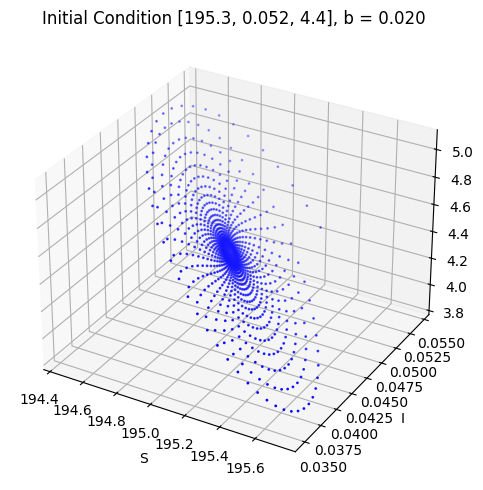

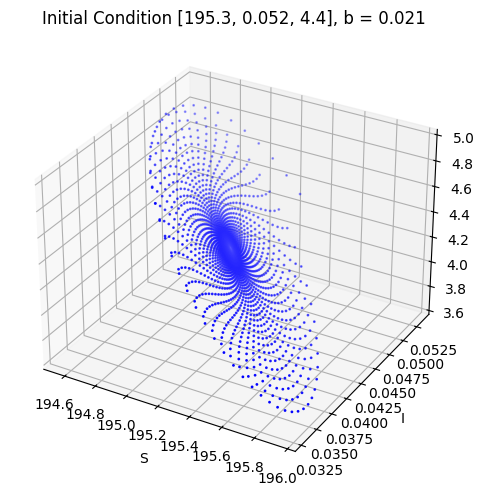

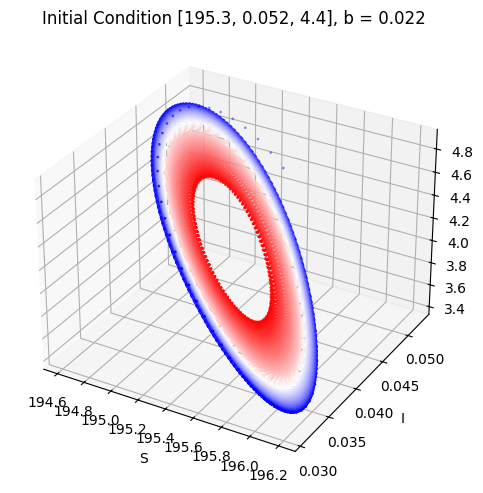

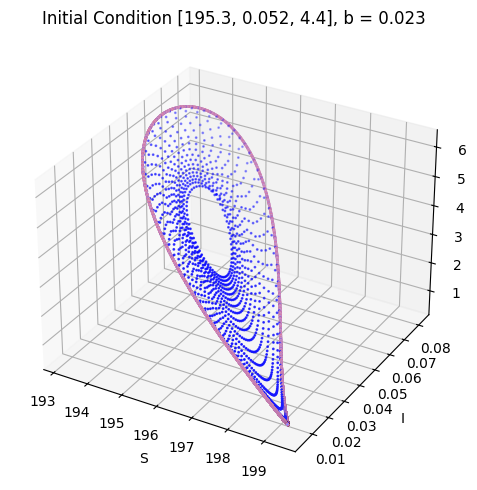

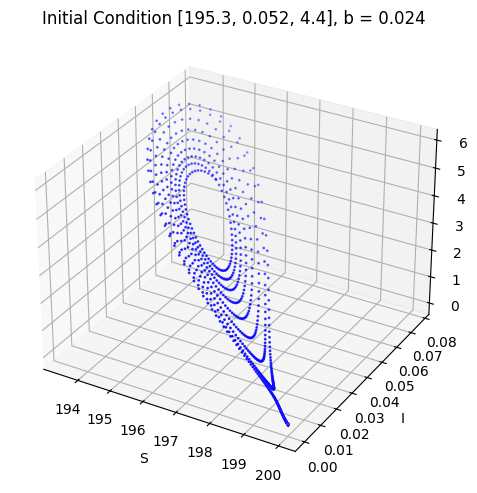

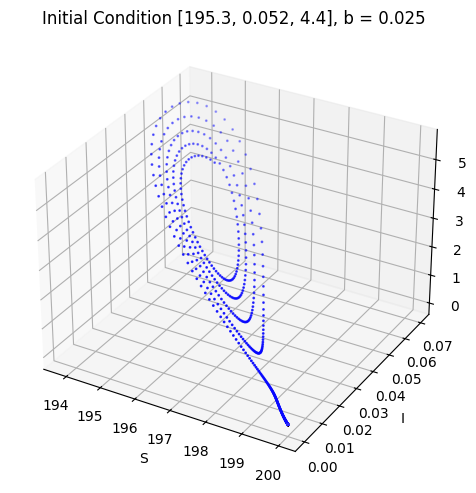

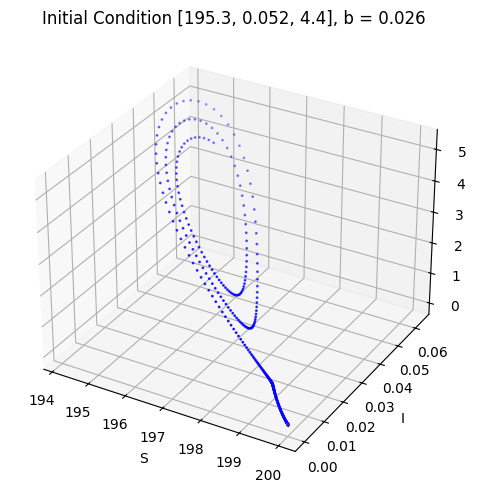

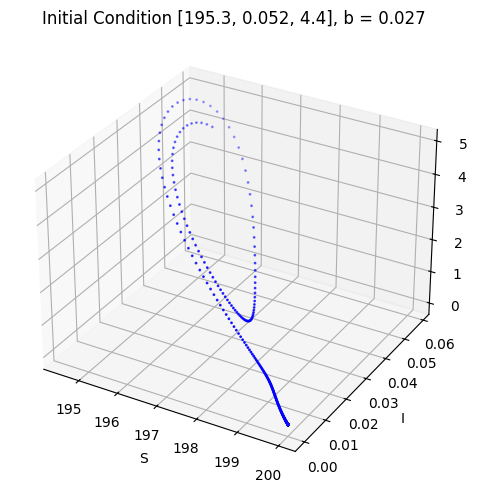

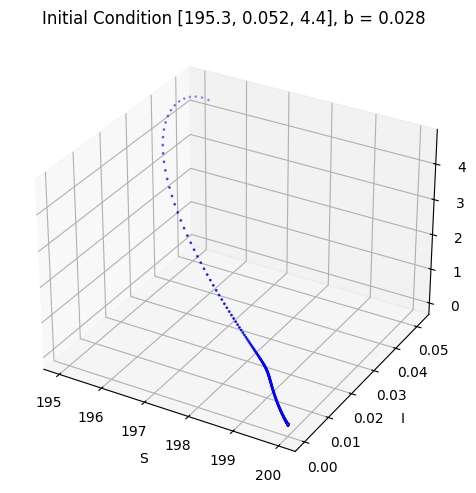

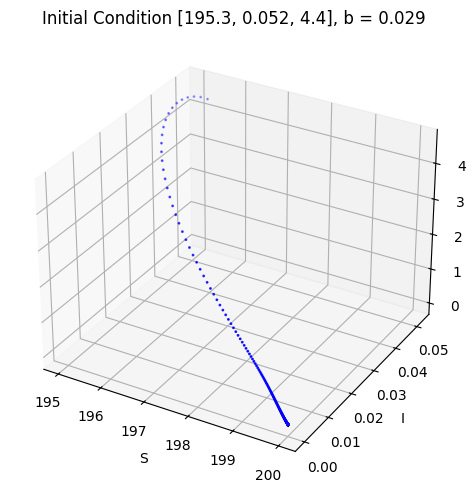

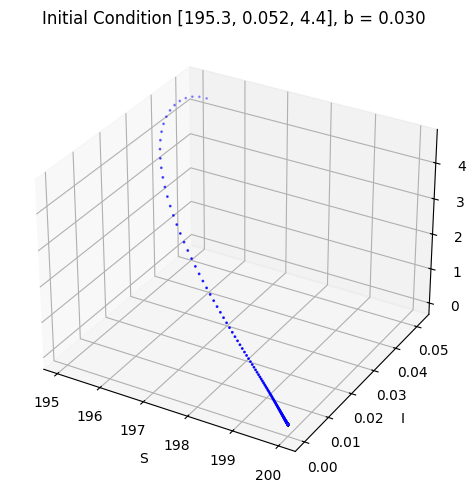

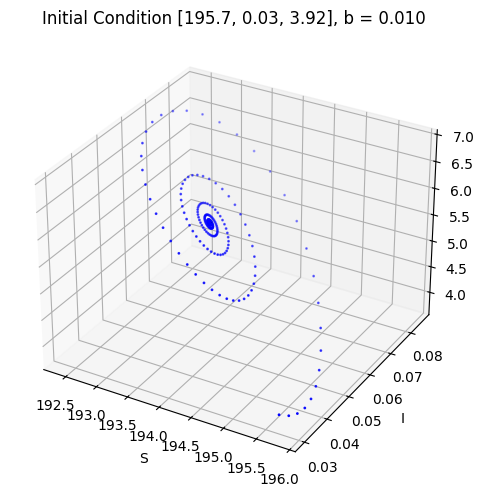

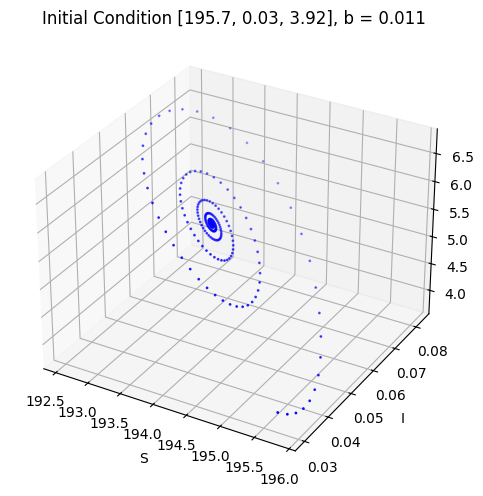

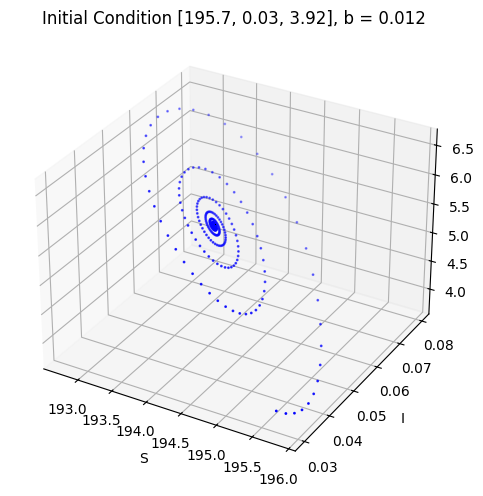

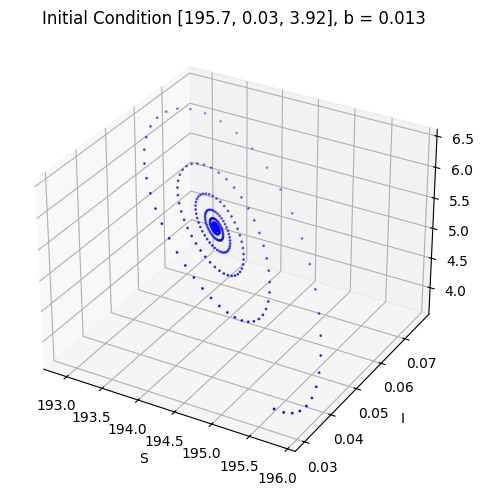

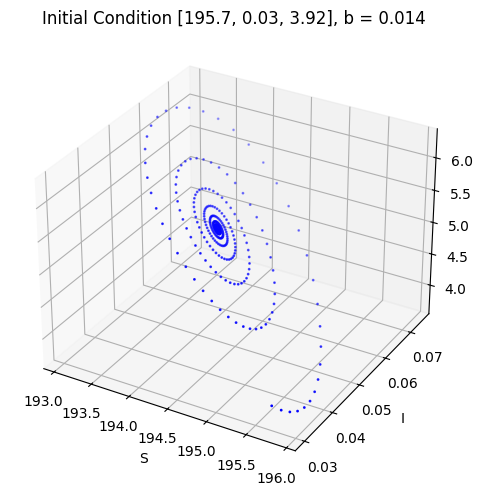

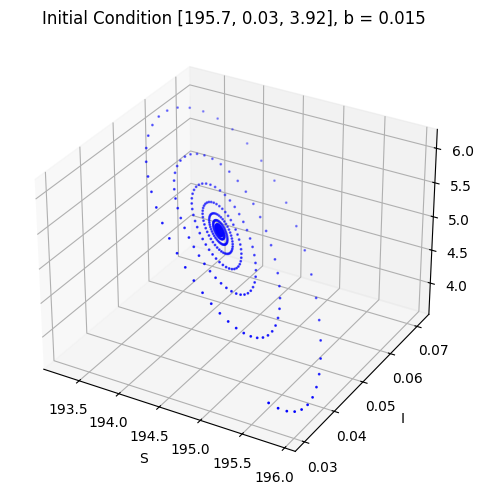

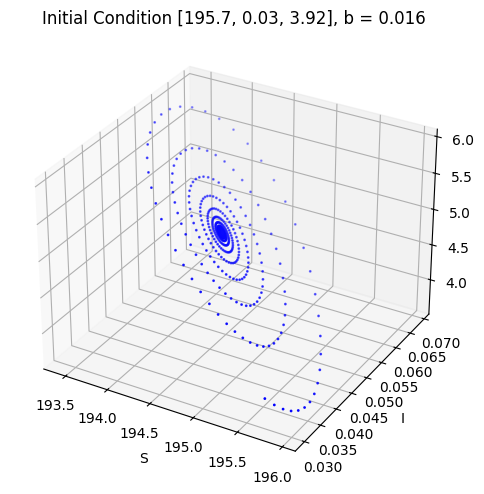

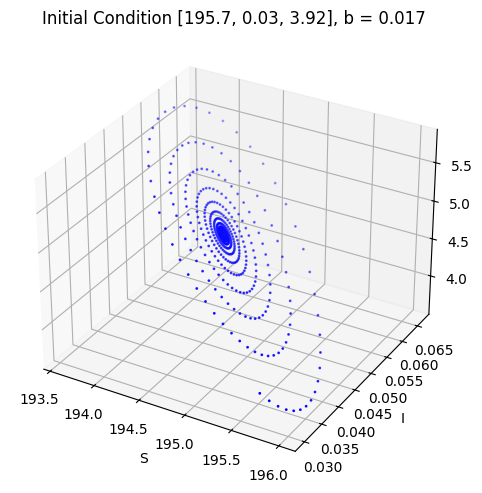

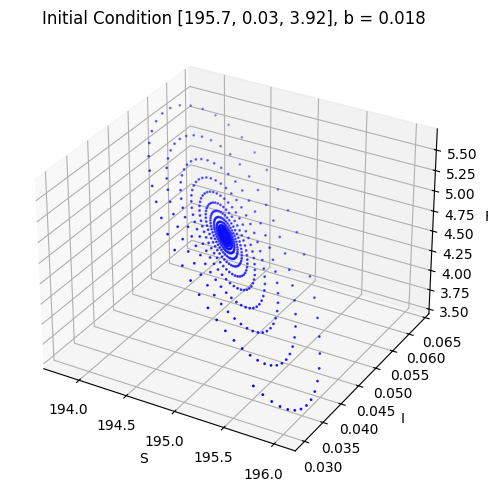

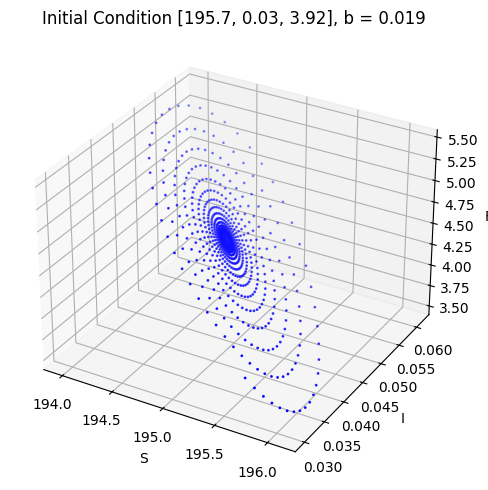

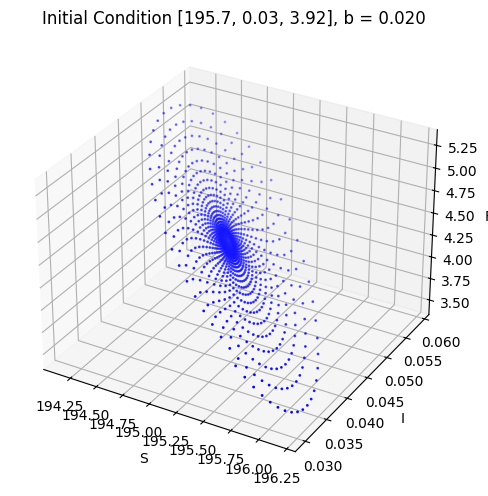

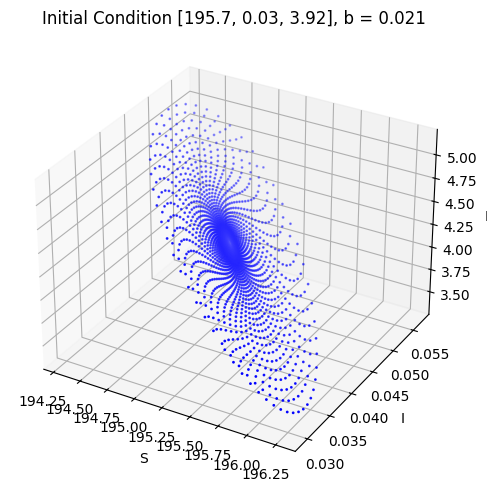

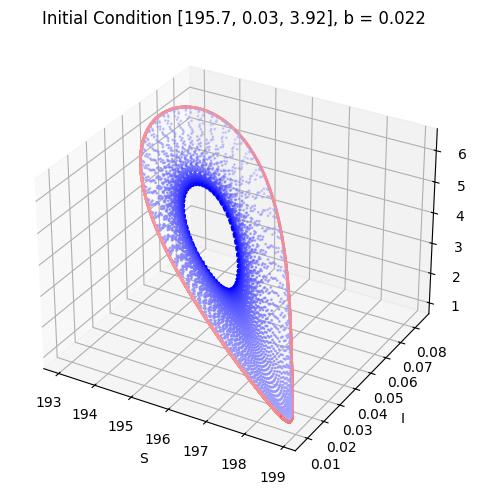

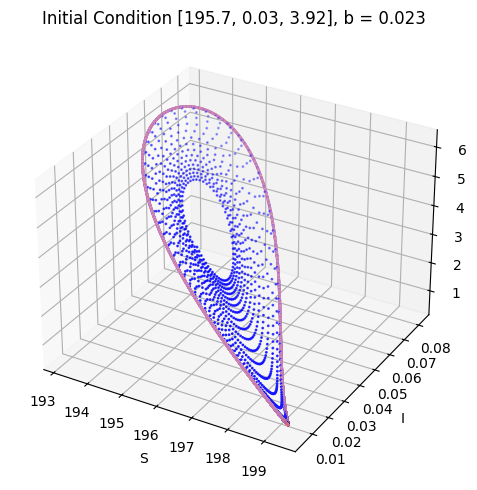

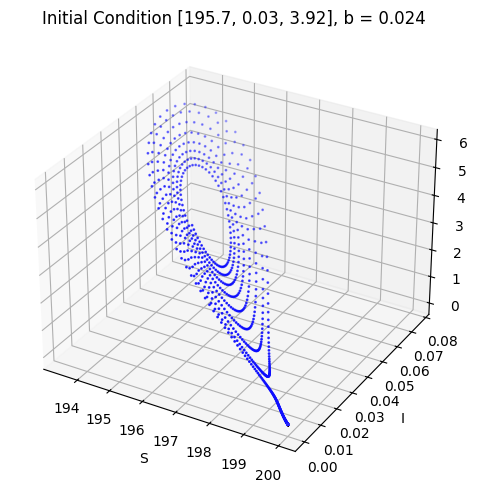

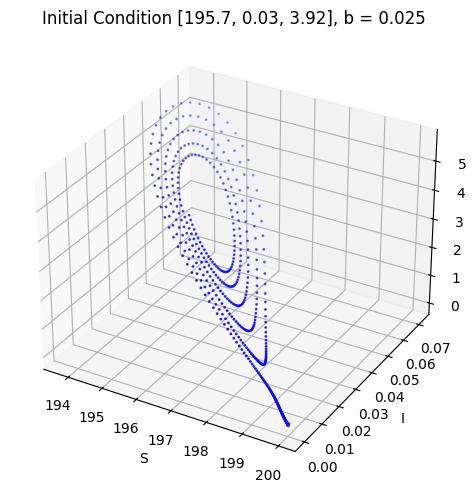

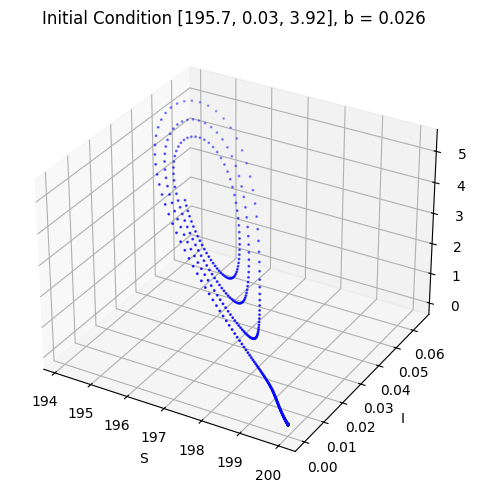

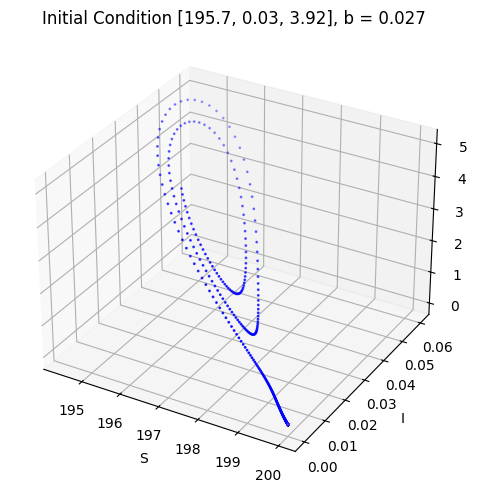

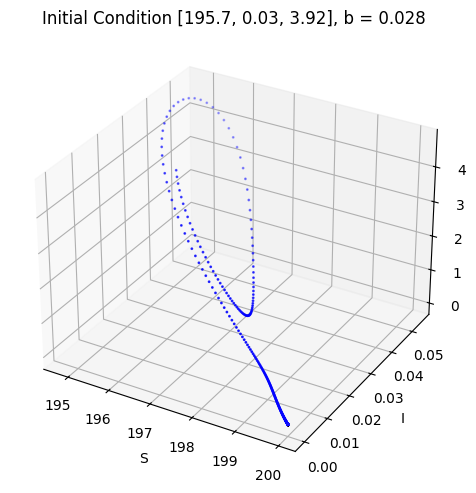

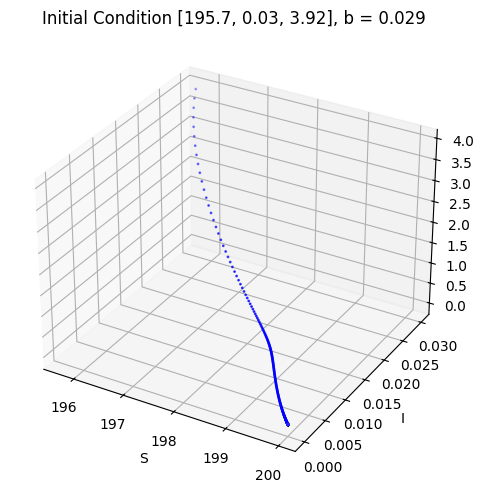

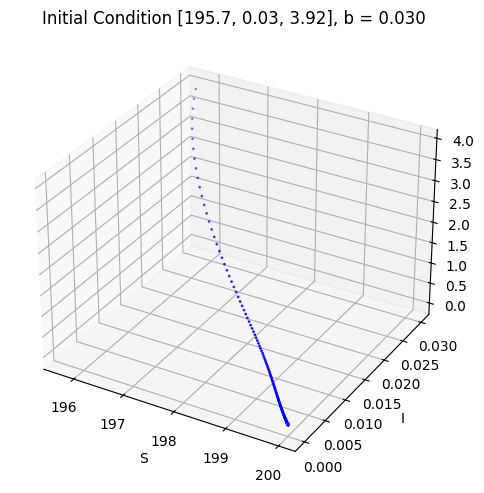

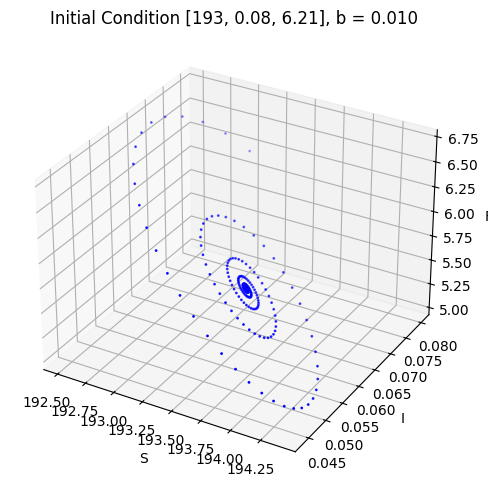

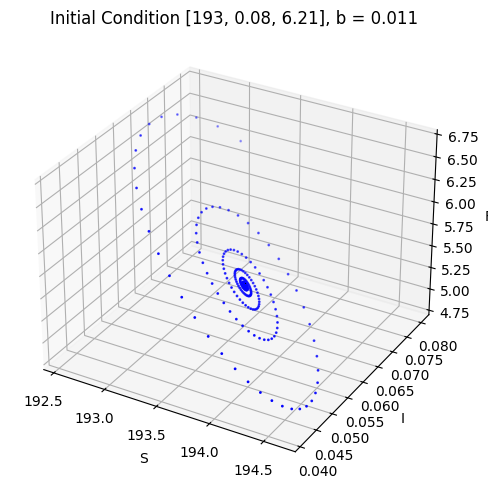

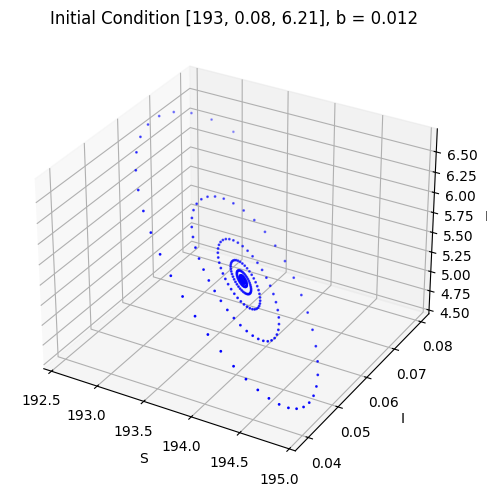

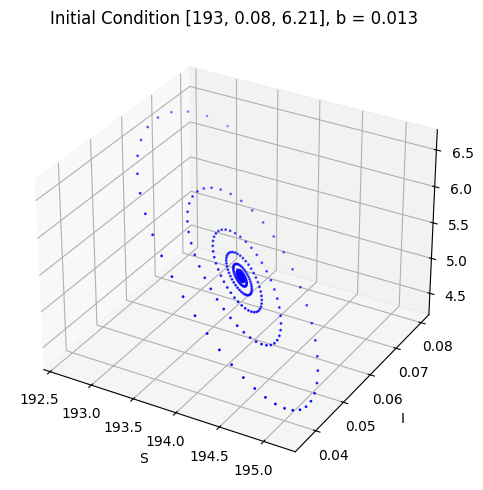

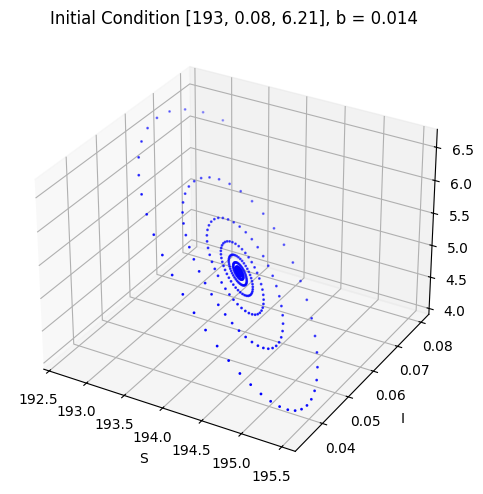

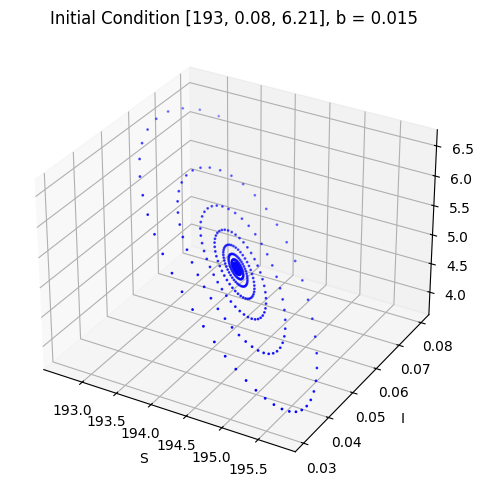

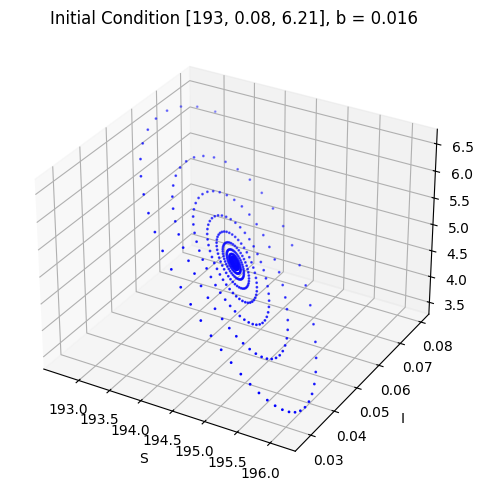

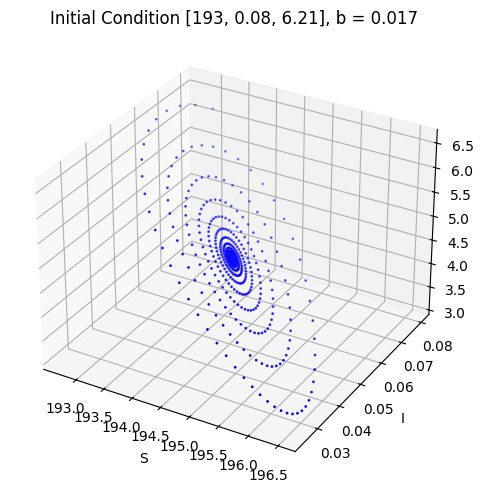

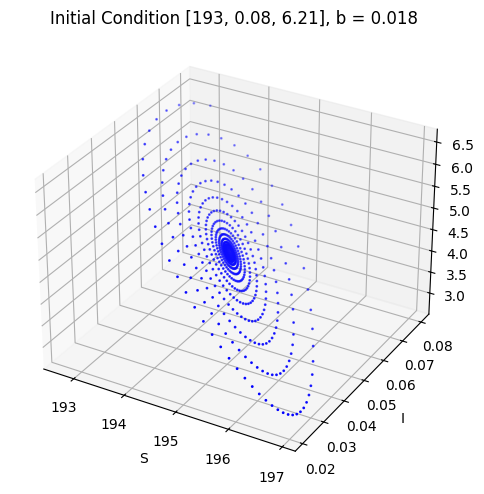

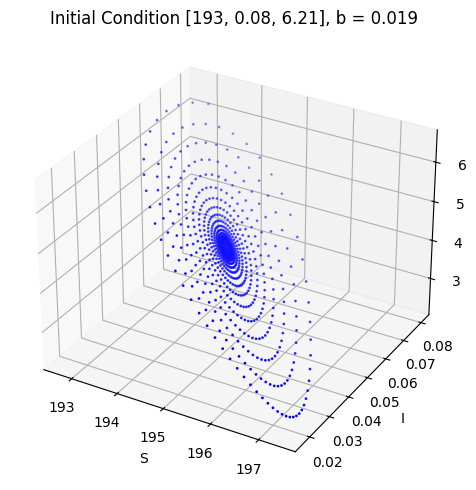

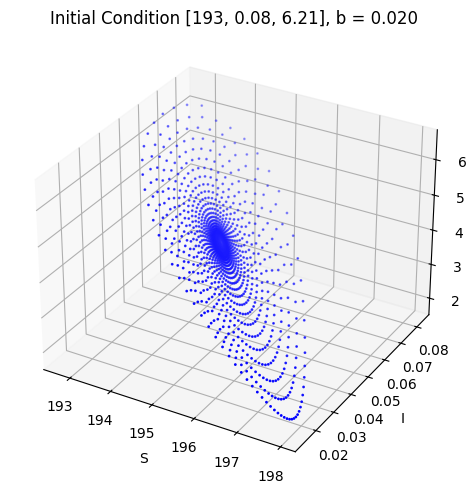

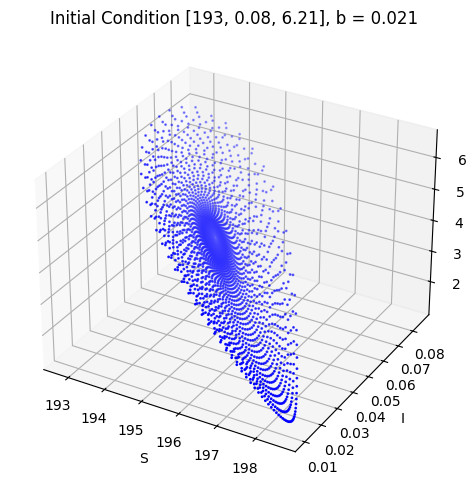

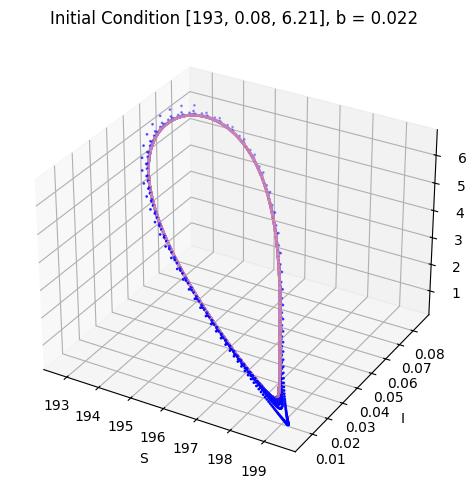

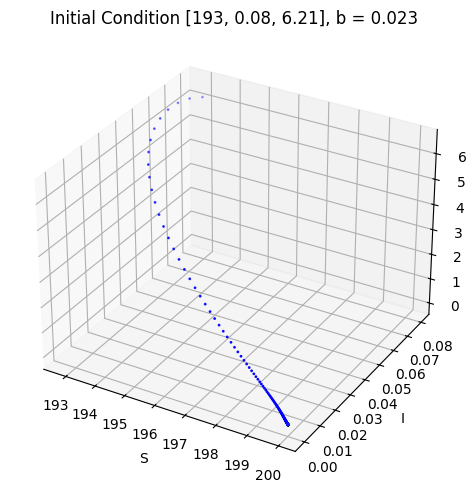

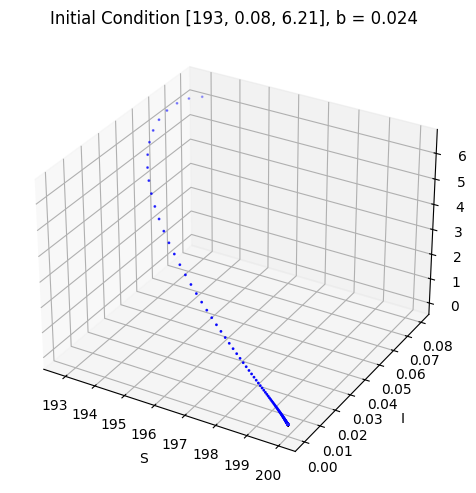

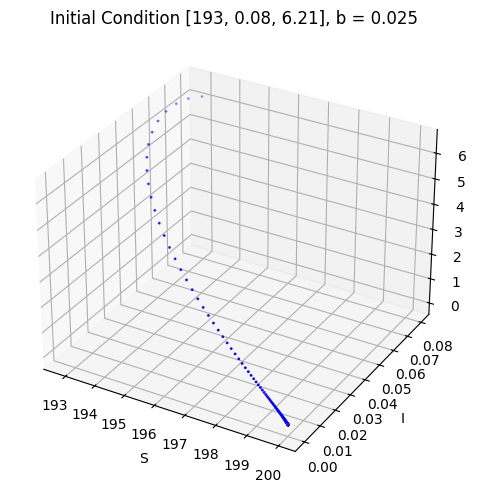

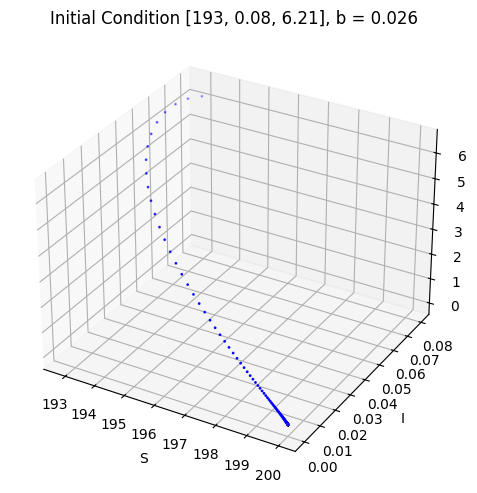

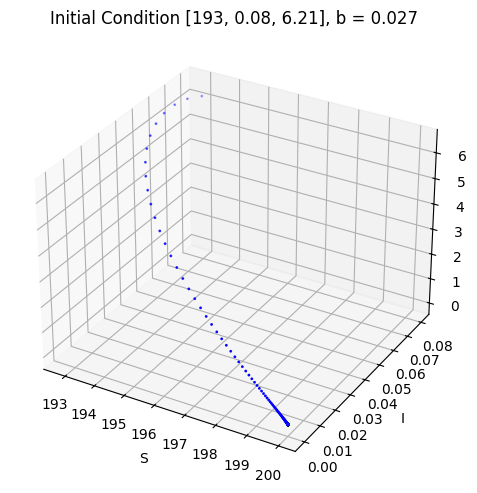

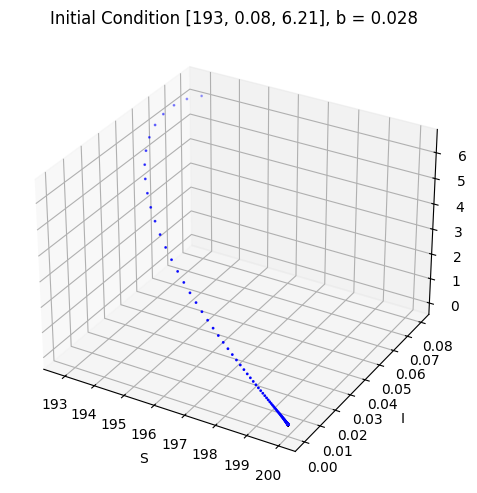

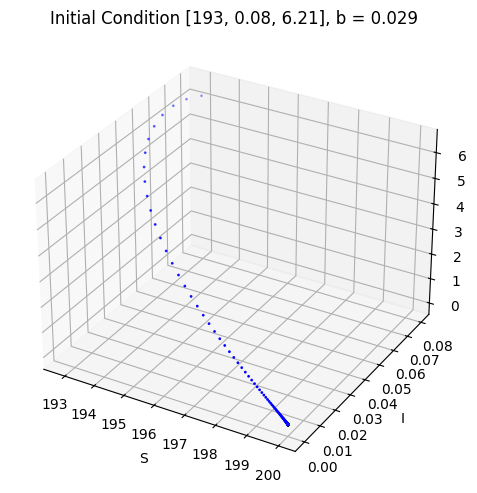

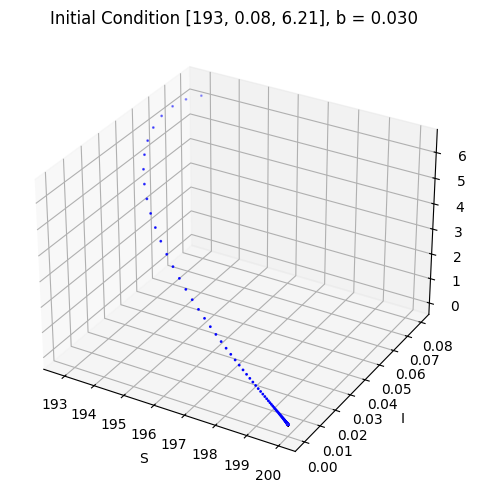

In [3]:
SIM_list = [
    [195.3, 0.052, 4.4],
    [195.7, 0.03, 3.92],
    [193, 0.08, 6.21],
]

b_values = np.arange(0.01, 0.031, 0.001)

t_0 = 0
t_end = 20000
NT = t_end-t_0

for i, SIM in enumerate(SIM_list):
    for j, b in enumerate(b_values):
        time = np.linspace(t_0, t_end, NT)
        sol = solve_ivp(
            model, t_span=[time[0], time[-1]], y0=SIM, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b),
            method='DOP853', rtol=rtol, atol=atol
        )
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, projection='3d')
        # ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
        ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');
        ax.set_title(f"Initial Condition {SIM_list[i]}, b = {b:.3f}")
        ax.set_xlabel("S")
        ax.set_ylabel("I")
        ax.set_zlabel("R")
        fig.tight_layout()

plt.show()

### Task 5.4

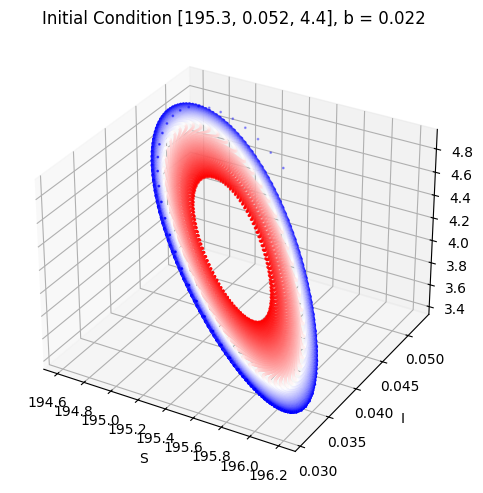

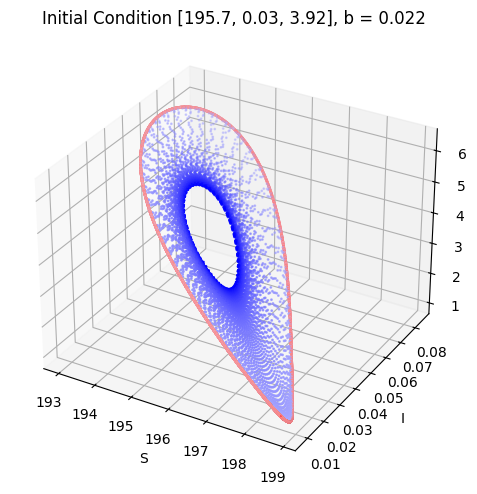

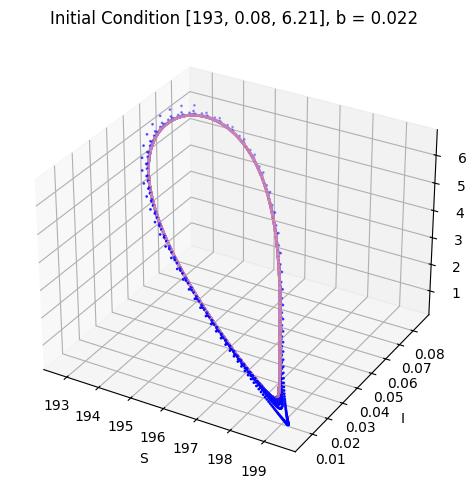

In [4]:
SIM_list = [
    [195.3, 0.052, 4.4],
    [195.7, 0.03, 3.92],
    [193, 0.08, 6.21],
]

b = 0.022

for i, SIM in enumerate(SIM_list):
        time = np.linspace(t_0, t_end, NT)
        sol = solve_ivp(
            model, t_span=[time[0], time[-1]], y0=SIM, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b),
            method='DOP853', rtol=rtol, atol=atol
        )
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, projection='3d')
        # ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
        ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');
        ax.set_title(f"Initial Condition {SIM_list[i]}, b = {b:.3f}")
        ax.set_xlabel("S")
        ax.set_ylabel("I")
        ax.set_zlabel("R")
        fig.tight_layout()




### 5.5

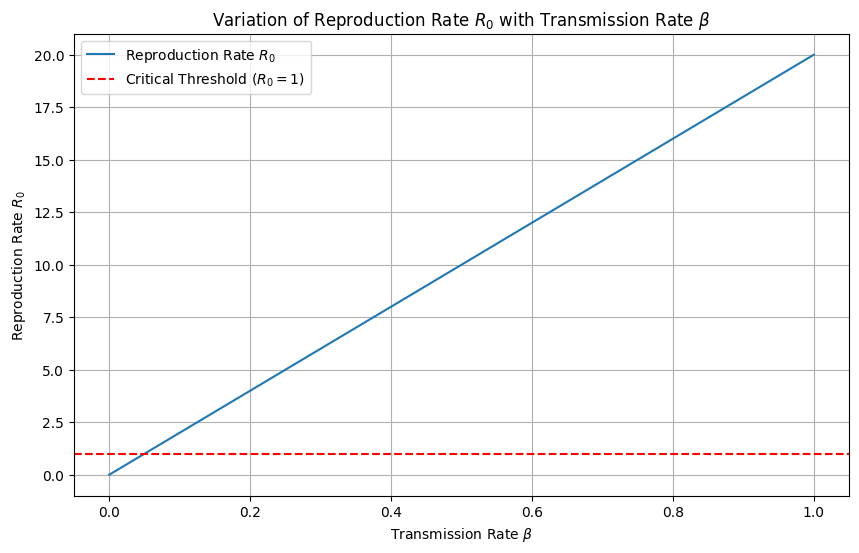

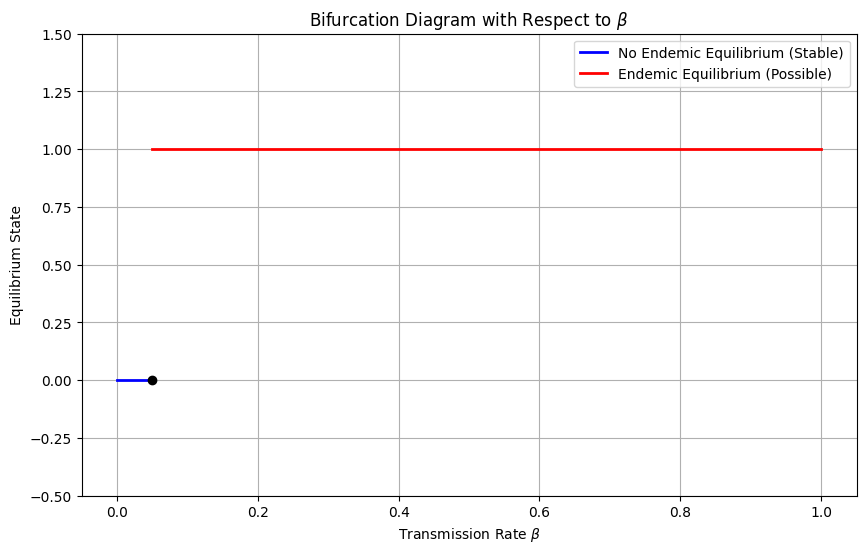

In [5]:

# Define the parameters
d = 0.01  # Natural death rate
nu = 0.01 # Disease-induced death rate
mu1 = 0.03 # Maximum recovery rate

# Define a range of beta values
beta_values = np.linspace(0, 1, 100)

# Calculate R0 for each beta value
R0_values = beta_values / (d + nu + mu1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_values, R0_values, label='Reproduction Rate $R_0$')
plt.xlabel('Transmission Rate $\\beta$')
plt.ylabel('Reproduction Rate $R_0$')
plt.title('Variation of Reproduction Rate $R_0$ with Transmission Rate $\\beta$')
plt.axhline(y=1, color='r', linestyle='--', label='Critical Threshold ($R_0 = 1$)')
plt.legend()
plt.grid(True)
plt.show()


# Bifurcation Diagram
# For simplicity, we'll assume a change in behavior occurs at R0 = 1
# As R0 = beta / (d + nu + mu1), we calculate beta at R0 = 1

beta_critical = (d + nu + mu1) * 1  # beta value at R0 = 1

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.plot([0, beta_critical], [0, 0], 'b-', lw=2, label='No Endemic Equilibrium (Stable)')
plt.plot([beta_critical, max(beta_values)], [1, 1], 'r-', lw=2, label='Endemic Equilibrium (Possible)')
plt.plot(beta_critical, 0, 'ko')  # Critical point
plt.xlabel('Transmission Rate $\\beta$')
plt.ylabel('Equilibrium State')
plt.title('Bifurcation Diagram with Respect to $\\beta$')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 1.5)

# Show the plot
plt.show()

### 5.6

In [6]:
from scipy.integrate import odeint

# Setting up parameters for R0 < 1 (Disease-free scenario)

A = 1000
d = 0.01  # Natural death rate
nu = 0.01 # Disease-induced death rate
mu1 = 0.03 # Maximum recovery rate
beta = 0.02 # Transmission rate, set to ensure R0 < 1

# Calculating the disease-free equilibrium E0
E0 = (A / d, 0, 0)

# Initial conditions for S, I, R close to E0 but not exactly at E0
initial_conditions = [
    (E0[0] * 1.05, 5, 5),  # Slightly higher S, small I and R
    (E0[0] * 0.95, 10, 0), # Slightly lower S, some I and no R
    (E0[0], 0, 10)         # Equal S, no I, some R
]

# Time points (in days)
t = np.linspace(0, 300, 300)

# Plotting the trajectories towards E0
plt.figure(figsize=(14, 8))

for S0, I0, R0 in initial_conditions:
    solution = odeint(model, [S0, I0, R0], t, args=(beta, d, nu, mu1))
    plt.plot(t, solution[:, 0], label=f'S (Initial: {S0:.0f})')
    plt.plot(t, solution[:, 1], label=f'I (Initial: {I0:.0f})')
    plt.plot(t, solution[:, 2], label=f'R (Initial: {R0:.0f})')

plt.xlabel('Time / days')
plt.ylabel('Number of Individuals')
plt.title('Trajectories of SIR Model Towards Disease-Free Equilibrium ($E_0$)')
plt.axhline(y=E0[0], color='grey', linestyle='--', label='Equilibrium Susceptible ($E_0$)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


TypeError: model() missing 3 required positional arguments: 'd', 'nu', and 'b'

<Figure size 1400x800 with 0 Axes>

### Bonus Task 

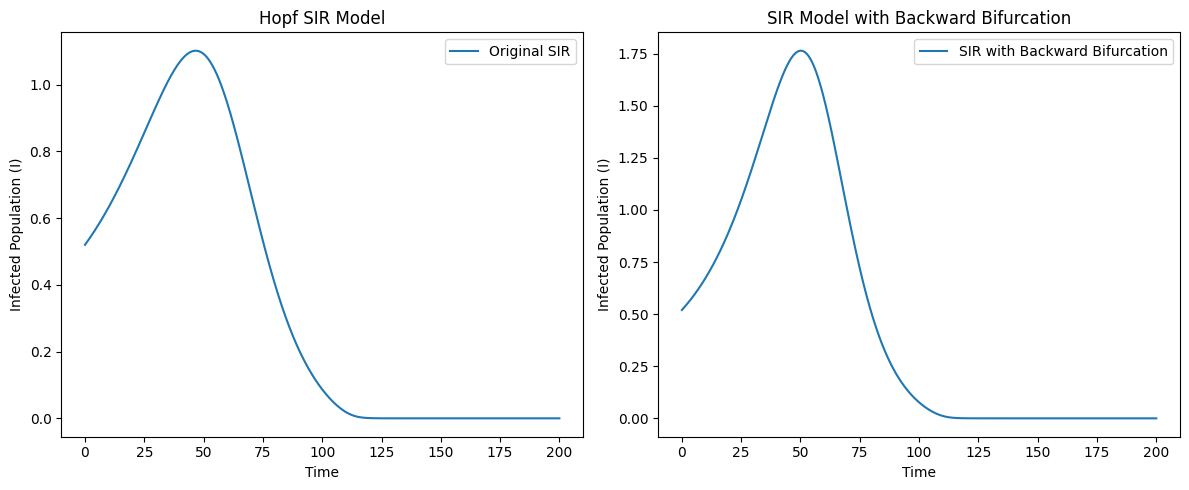

In [ ]:
# Other parameters
mu0 = 0.1
mu1 = 0.5
beta = 0.2
A = 0.1
d = 0.05
nu = 0.01
b = 0.022
epsilon = 0.01  # You can adjust this for backward bifurcation

# Initial conditions
initial_conditions = [195.3, 0.52, 4.4]

# Time span for simulation
t_span = [0, 200]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the original SIR model
sol_original = solve_ivp(
    model, t_span=t_span, y0=initial_conditions, t_eval=t_eval,
    args=(mu0, mu1, beta, A, d, nu, b),
    method='DOP853', rtol=1e-6, atol=1e-8
)

# Solve the SIR model with backward bifurcation
sol_backward_bifurcation = solve_ivp(
    model_with_backward_bifurcation, t_span=t_span, y0=initial_conditions, t_eval=t_eval,
    args=(mu0, mu1, beta, A, d, nu, b, epsilon),
    method='DOP853', rtol=1e-6, atol=1e-8
)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_original.t, sol_original.y[1], label='Original SIR')
plt.xlabel('Time')
plt.ylabel('Infected Population (I)')
plt.title('Hopf SIR Model')
# plt.xlim([0, 30])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol_backward_bifurcation.t, sol_backward_bifurcation.y[1], label='SIR with Backward Bifurcation')
plt.xlabel('Time')
plt.ylabel('Infected Population (I)')
plt.title('SIR Model with Backward Bifurcation')
# plt.xlim([0, 30])
plt.legend()

plt.tight_layout()
plt.show()